**Analyzing RNA-seq data with DESeq2**

See Documentation: https://bioconductor.org/packages/devel/bioc/vignettes/DESeq2/inst/doc/DESeq2.html

In [1]:
library("DESeq2")
library("rJava")
library("openxlsx")

Loading required package: S4Vectors

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which.max, which.min



Attaching package: ‘S4Vectors’


The following object is masked from ‘package:utils’:

    findMatches


The following objects are masked from ‘package:base’:

    expand.grid, I, unname


Loading required package: IRanges

Loading required package: GenomicRanges

Loading required package: GenomeInfoDb

Loa

Files needed:
- counts matrix
- comparisons file (contrast file)
- sample

In [3]:
# Read in counts data
rawdata <- read.table("all.matrix.tsv", sep = "\t", header = F)
rawdata

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
ENSG,Huh_1,Huh_2,Huh_3,Huh_4,Huh_5,Huh_6,Huh_7,Huh_8,Huh_9,⋯,MD_15,MD_16,MD_17,MD_18,MD_19,MD_20,MD_21,MD_22,MD_23,MD_24
ENSG00000160072,1420,1600,615,1054,727,1023,942,800,886,⋯,1697,1964,1177,1526,2191,1918,1795,1741,2208,1888
ENSG00000234396,0,1,0,0,0,1,1,0,0,⋯,0,2,2,0,0,3,1,0,3,0
ENSG00000225972,4667,5252,4510,6675,3946,5523,5072,4910,5160,⋯,22,14,11,23,22,15,22,12,35,9
ENSG00000224315,4,0,0,1,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,1,0
ENSG00000198744,39,27,26,40,27,23,48,32,25,⋯,20,11,13,18,35,28,13,16,56,33
ENSG00000279928,0,0,0,0,0,0,0,0,0,⋯,3,0,0,0,0,0,0,0,0,0
ENSG00000228037,0,0,0,1,0,5,1,0,4,⋯,0,1,1,1,1,0,0,1,0,0
ENSG00000142611,468,581,631,1011,801,1110,780,779,987,⋯,6,17,1,5,6,7,8,7,7,6


In [4]:
data <- rawdata[-1,-1] #remove first row and first column
data <- as.matrix(data) #convert to matrix, coerce all data to common data type
class(data) <- "numeric" #convert data type from character to numeric

# set headers
columnhead <- rawdata[1,-1]
rowhead <- rawdata[-1,1]

colnames(data) <- columnhead
rownames(data) <- rowhead

data

,Huh_1,Huh_2,Huh_3,Huh_4,Huh_5,Huh_6,Huh_7,Huh_8,Huh_9,Huh_10,⋯,MD_15,MD_16,MD_17,MD_18,MD_19,MD_20,MD_21,MD_22,MD_23,MD_24
ENSG00000160072,1420,1600,615,1054,727,1023,942,800,886,833,⋯,1697,1964,1177,1526,2191,1918,1795,1741,2208,1888
ENSG00000234396,0,1,0,0,0,1,1,0,0,2,⋯,0,2,2,0,0,3,1,0,3,0
ENSG00000225972,4667,5252,4510,6675,3946,5523,5072,4910,5160,4785,⋯,22,14,11,23,22,15,22,12,35,9
ENSG00000224315,4,0,0,1,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,1,0
ENSG00000198744,39,27,26,40,27,23,48,32,25,25,⋯,20,11,13,18,35,28,13,16,56,33
ENSG00000279928,0,0,0,0,0,0,0,0,0,0,⋯,3,0,0,0,0,0,0,0,0,0
ENSG00000228037,0,0,0,1,0,5,1,0,4,3,⋯,0,1,1,1,1,0,0,1,0,0
ENSG00000142611,468,581,631,1011,801,1110,780,779,987,884,⋯,6,17,1,5,6,7,8,7,7,6
ENSG00000225630,709,632,490,829,481,582,741,520,619,633,⋯,1299,1030,1116,1767,1055,841,679,641,837,805
ENSG00000284616,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [5]:
# read in sample table
sample_table <- read.table("all.SampeTable.tsv", sep = "\t", header = T, row.names = 1)
sample_table$condition_and_cellline <- paste(sample_table$condition, sample_table$cell_line, sep = "_")
sample_table$condition_and_cellline <- factor(sample_table$condition_and_cellline)

In [7]:
# reorder the sample table so that the rows of sample table are in same order as columns of counts table

sample_table <- sample_table[colnames(data), ]
rownames(sample_table) <- colnames(data)

sample_table

,condition,cell_line,condition_and_cellline
,<chr>,<chr>,<fct>
Huh_1,DMSO,Huh,DMSO_Huh
Huh_2,DMSO,Huh,DMSO_Huh
Huh_3,DFP_100,Huh,DFP_100_Huh
Huh_4,DFP_100,Huh,DFP_100_Huh
Huh_5,DFP_200,Huh,DFP_200_Huh
Huh_6,DFP_200,Huh,DFP_200_Huh
Huh_7,Cle_C6K_2_5,Huh,Cle_C6K_2_5_Huh
Huh_8,Cle_C6K_2_5,Huh,Cle_C6K_2_5_Huh
Huh_9,Cle_C6K_5,Huh,Cle_C6K_5_Huh


In [8]:
# read in contrast (comparisons) file
cons_table <- read.table("cons_01.DFP", sep = ",")

In [9]:
cons_table

V1,V2
<chr>,<chr>
DFP_100_MD,DMSO_MD
DFP_200_MD,DMSO_MD
DFP_100_Huh,DMSO_Huh
DFP_200_Huh,DMSO_Huh
DFP_100_MCF,DMSO_MCF
DFP_200_MCF,DMSO_MCF


In [10]:
# create dds object

dds <- DESeqDataSetFromMatrix(data,
                              colData = sample_table,
                              formula(~ condition_and_cellline))

converting counts to integer mode



In [11]:
dds

class: DESeqDataSet 
dim: 61860 72 
metadata(1): version
assays(1): counts
rownames(61860): ENSG00000160072 ENSG00000234396 ... ENSG00000277475
  ENSG00000275405
rowData names(0):
colnames(72): Huh_1 Huh_2 ... MD_23 MD_24
colData names(3): condition cell_line condition_and_cellline

In [12]:
# perform differential gene expression analysis
dds<-DESeq(dds)

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



In [13]:
# normalize
norm<-counts(dds,normalized=TRUE)

In [14]:
# run results for every contrast in the contrast file

run_comparisons <- function(dds_obj, contr_table, sampl_table){

    result_matrices_list <- list()
    list_DEGs_each_con <- list()
    list_reps_each_con <- list()
    
    # run comparisons, get results, DEGs, and replicates for every contrast.
    for (i in 1:nrow(contr_table)) {

        # read in contrast as vector, perform results() on dds obj
        vec_con_i <- as.character(contr_table[i, , drop = TRUE])
        result_i <- results(dds_obj, contrast = c("condition_and_cellline", vec_con_i[1], vec_con_i[2]))
        
        contrast <- paste("condition_and_cellline", vec_con_i[1], "_vs_", vec_con_i[2])

        # subset replicates from sample table using condition
        # (getting the rows from sample table whose condition_and_cellline vals are in vec_con_i), and add to list
        rep_con_i = which(sampl_table$condition_and_cellline %in% vec_con_i)
        rep_con_i = sampl_table[rep_con_i,]
        list_reps_each_con[[i]] <- rep_con_i

        # get DEGs from cut offs, and add to list
        DEG_i <- result_i[which(abs(result_i$log2FoldChange) >  1.0 & result_i$padj < 0.05),]
        list_DEGs_each_con[[i]] <- DEG_i

        # get results for the comparison
        # adjust the pvalues with BH method, keeping NA values as NA
        p_values <- result_i$pvalue
        p_values[!is.na(p_values)] <- p.adjust(p_values[!is.na(p_values)], method = "BH")
        result_i$padjusted <- p_values

        result_i_pval_logFC <- result_i[, c("log2FoldChange", "padjusted"), drop = FALSE]
        
        headers_i_pval_logFC <- c(paste(vec_con_i[1], "/", vec_con_i[2], " log2FC"),
                                            paste(vec_con_i[1], "/", vec_con_i[2], " padj"))
        
        colnames(result_i_pval_logFC) <- headers_i_pval_logFC
        # current result (with column names)

        # store current result in list
        result_matrices_list[[i]] <- result_i_pval_logFC

    }

    # return all results in a list
    return(list(result_matrices_list = result_matrices_list, list_DEGs_each_con = list_DEGs_each_con, list_reps_each_con = list_reps_each_con))

}

In [15]:
# call function and run comparisons
obj_containing_DEGs_and_resultmatriceslist <- run_comparisons(dds, cons_table, sample_table)

In [16]:
# access the list of results for each comparison
result_matrices_lst <- obj_containing_DEGs_and_resultmatriceslist$result_matrices_list

In [17]:
# access the list of replicates for each comparison
listof_reps_each_con <- obj_containing_DEGs_and_resultmatriceslist$list_reps_each_con

In [18]:
# access list of DEGs for each comparison
listof_DEGs_each_con <- obj_containing_DEGs_and_resultmatriceslist$list_DEGs_each_con

In [19]:
# function that gets all unique DEGs, store as vector
get_unique_DEGs <- function(df_list){
    unique_DEGs <- unique(unlist(lapply(df_list, rownames)))
    return(unique_DEGs)
}

In [20]:
uniqueDEGS <- get_unique_DEGs(listof_DEGs_each_con)

In [21]:
# write a function that gets all unique replicates, store as vector
get_unique_replicates <- function(df_list){
    unique_replicates <- unique(unlist(lapply(df_list, rownames)))
    return(unique_replicates)
}

In [22]:
unique_replicates <- get_unique_replicates(listof_reps_each_con)

All the information above allows us to make the heatmap shown at the end.

**Run Individual Comparisons**

In [24]:
# view all comparisons
levels(dds$condition_and_cellline)

[1] "Cle_C6K_10_Huh"  "Cle_C6K_2_5_Huh" "Cle_C6K_5_Huh"   "Cle_C8K_0_5_Huh"
 [5] "Cle_C8K_1_Huh"   "DFP_100_Huh"     "DFP_100_MCF"     "DFP_100_MD"     
 [9] "DFP_200_Huh"     "DFP_200_MCF"     "DFP_200_MD"      "DMSO_1_Huh"     
[13] "DMSO_1_MCF"      "DMSO_1_MD"       "DMSO_Huh"        "DMSO_MCF"       
[17] "DMSO_MD"         "GSK_J4_3_5_Huh"  "GSK_J4_3_5_MCF"  "GSK_J4_3_5_MD"  
[21] "GSK_J4_7_Huh"    "GSK_J4_7_MCF"    "GSK_J4_7_MD"     "JIB_04_0_5_Huh" 
[25] "JIB_04_0_5_MCF"  "JIB_04_0_5_MD"   "JIB_04_1_Huh"    "JIB_04_1_MCF"   
[29] "JIB_04_1_MD"     "MSC6K_0_5_MCF"   "MSC6K_0_5_MD"    "MSC6K_1_MCF"    
[33] "MSC6K_1_MD"      "SC6K_10_MCF"     "SC6K_10_MD"      "SC6K_5_MCF"     
[37] "SC6K_5_MD"

In [15]:
# function to run a single comparison
run_i <- function(dds_obj, vec_con_i){
    result_i <- results(dds_obj, contrast = c("condition_and_cellline", vec_con_i))
    DEG_i <- result_i[which(abs(result_i$log2FoldChange) >  1.0 & result_i$padj < 0.05),]
    DEGs_i = row.names(DEG_i)

    rep_con_i = which(sample_table$condition_and_cellline %in% vec_con_i)
    rep_con_i = sample_table[rep_con_i,]
    rep_con_i = row.names(rep_con_i)
    return(list(rep_con_i,DEGs_i))

}

l=run_i(dds,c('DFP_100_MD','DMSO_MD'))

In [40]:
l[2]

[[1]]
  [1] "ENSG00000162692" "ENSG00000171517" "ENSG00000143858" "ENSG00000143590"
  [5] "ENSG00000203857" "ENSG00000163909" "ENSG00000131910" "ENSG00000143847"
  [9] "ENSG00000224081" "ENSG00000177181" "ENSG00000198574" "ENSG00000162490"
 [13] "ENSG00000160712" "ENSG00000264343" "ENSG00000236423" "ENSG00000084710"
 [17] "ENSG00000204792" "ENSG00000119866" "ENSG00000230836" "ENSG00000159399"
 [21] "ENSG00000225205" "ENSG00000171227" "ENSG00000152256" "ENSG00000230432"
 [25] "ENSG00000123999" "ENSG00000082126" "ENSG00000084734" "ENSG00000261051"
 [29] "ENSG00000152952" "ENSG00000240032" "ENSG00000144908" "ENSG00000181458"
 [33] "ENSG00000088726" "ENSG00000114812" "ENSG00000144792" "ENSG00000114268"
 [37] "ENSG00000144821" "ENSG00000114023" "ENSG00000091490" "ENSG00000173376"
 [41] "ENSG00000248019" "ENSG00000198515" "ENSG00000205129" "ENSG00000272870"
 [45] "ENSG00000177453" "ENSG00000251281" "ENSG00000280047" "ENSG00000271781"
 [49] "ENSG00000092421" "ENSG00000113248" "ENSG00000120129" "ENSG00000187566"
 [53] "ENSG00000198729" "ENSG00000288009" "ENSG00000285730" "ENSG00000231881"
 [57] "ENSG00000234155" "ENSG00000179344" "ENSG00000124762" "ENSG00000285888"
 [61] "ENSG00000164849" "ENSG00000232445" "ENSG00000086730" "ENSG00000170379"
 [65] "ENSG00000009950" "ENSG00000243566" "ENSG00000105877" "ENSG00000253882"
 [69] "ENSG00000223855" "ENSG00000147027" "ENSG00000182378" "ENSG00000171388"
 [73] "ENSG00000102144" "ENSG00000159167" "ENSG00000003987" "ENSG00000164683"
 [77] "ENSG00000104267" "ENSG00000104419" "ENSG00000104368" "ENSG00000167701"
 [81] "ENSG00000228451" "ENSG00000213213" "ENSG00000147852" "ENSG00000107159"
 [85] "ENSG00000165124" "ENSG00000188487" "ENSG00000133317" "ENSG00000137727"
 [89] "ENSG00000247095" "ENSG00000148488" "ENSG00000273143" "ENSG00000196968"
 [93] "ENSG00000122884" "ENSG00000148848" "ENSG00000176171" "ENSG00000215244"
 [97] "ENSG00000170525" "ENSG00000111674" "ENSG00000234498" "ENSG00000136155"
[101] "ENSG00000150893" "ENSG00000283199" "ENSG00000229373" "ENSG00000185352"
[105] "ENSG00000119630" "ENSG00000139998" "ENSG00000140022" "ENSG00000251002"
[109] "ENSG00000185634" "ENSG00000069667" "ENSG00000197361" "ENSG00000159337"
[113] "ENSG00000103056" "ENSG00000162004" "ENSG00000278341" "ENSG00000259877"
[117] "ENSG00000279692" "ENSG00000108950" "ENSG00000141337" "ENSG00000212724"
[121] "ENSG00000267327" "ENSG00000267270" "ENSG00000101265" "ENSG00000064787"
[125] "ENSG00000061656" "ENSG00000065717" "ENSG00000267058" "ENSG00000007255"
[129] "ENSG00000167772" "ENSG00000131398" "ENSG00000089847" "ENSG00000099840"
[133] "ENSG00000025708"

In [41]:
len_comp1<- length(unlist(l[2]))
len_comp1

[1] 133

In [42]:
l2=run_i(dds,c('DFP_200_MD','DMSO_MD'))
len_comp2<- length(unlist(l2[2]))
len_comp2

[1] 793

In [43]:
l2

[[1]]
[1] "MD_1" "MD_2" "MD_5" "MD_6"

[[2]]
  [1] "ENSG00000149527" "ENSG00000162444" "ENSG00000227634" "ENSG00000226396"
  [5] "ENSG00000188910" "ENSG00000225077" "ENSG00000006555" "ENSG00000169213"
  [9] "ENSG00000116652" "ENSG00000132122" "ENSG00000116157" "ENSG00000134215"
 [13] "ENSG00000162692" "ENSG00000171517" "ENSG00000261168" "ENSG00000198771"
 [17] "ENSG00000135842" "ENSG00000143248" "ENSG00000260855" "ENSG00000227953"
 [21] "ENSG00000162772" "ENSG00000076356" "ENSG00000198929" "ENSG00000143858"
 [25] "ENSG00000133069" "ENSG00000143322" "ENSG00000180287" "ENSG00000234678"
 [29] "ENSG00000054392" "ENSG00000188739" "ENSG00000135750" "ENSG00000143341"
 [33] "ENSG00000143590" "ENSG00000236263" "ENSG00000133019" "ENSG00000162383"
 [37] "ENSG00000049089" "ENSG00000171488" "ENSG00000117115" "ENSG00000203857"
 [41] "ENSG00000260941" "ENSG00000229372" "ENSG00000163909" "ENSG00000143369"
 [45] "ENSG00000197852" "ENSG00000171385" "ENSG00000162755" "ENSG00000196188"
 [49] "ENSG00000162777" "ENSG00000230896" "ENSG00000117245" "ENSG00000073756"
 [53] "ENSG00000057468" "ENSG00000117399" "ENSG00000272068" "ENSG00000272405"
 [57] "ENSG00000027869" "ENSG00000237330" "ENSG00000143502" "ENSG00000116852"
 [61] "ENSG00000242125" "ENSG00000200087" "ENSG00000280924" "ENSG00000179546"
 [65] "ENSG00000171812" "ENSG00000185436" "ENSG00000116991" "ENSG00000187800"
 [69] "ENSG00000168509" "ENSG00000162373" "ENSG00000131910" "ENSG00000253368"
 [73] "ENSG00000203814" "ENSG00000270882" "ENSG00000281207" "ENSG00000117152"
 [77] "ENSG00000143847" "ENSG00000286966" "ENSG00000162641" "ENSG00000127129"
 [81] "ENSG00000224081" "ENSG00000230615" "ENSG00000077585" "ENSG00000134222"
 [85] "ENSG00000177181" "ENSG00000076864" "ENSG00000198574" "ENSG00000224687"
 [89] "ENSG00000130762" "ENSG00000078900" "ENSG00000162591" "ENSG00000134242"
 [93] "ENSG00000162490" "ENSG00000162711" "ENSG00000116701" "ENSG00000176092"
 [97] "ENSG00000160712" "ENSG00000116285" "ENSG00000215912" "ENSG00000271576"
[101] "ENSG00000223345" "ENSG00000236423" "ENSG00000290124" "ENSG00000084710"
[105] "ENSG00000138061" "ENSG00000158125" "ENSG00000171132" "ENSG00000204792"
[109] "ENSG00000119866" "ENSG00000230836" "ENSG00000159399" "ENSG00000125538"
[113] "ENSG00000186684" "ENSG00000236255" "ENSG00000152127" "ENSG00000152128"
[117] "ENSG00000115844" "ENSG00000224063" "ENSG00000079156" "ENSG00000225205"
[121] "ENSG00000144583" "ENSG00000171227" "ENSG00000115548" "ENSG00000168427"
[125] "ENSG00000178752" "ENSG00000152256" "ENSG00000204128" "ENSG00000213901"
[129] "ENSG00000230432" "ENSG00000163053" "ENSG00000115112" "ENSG00000171848"
[133] "ENSG00000182389" "ENSG00000082126" "ENSG00000003137" "ENSG00000123612"
[137] "ENSG00000170500" "ENSG00000115850" "ENSG00000125629" "ENSG00000155657"
[141] "ENSG00000185304" "ENSG00000115194" "ENSG00000230606" "ENSG00000228486"
[145] "ENSG00000168899" "ENSG00000079150" "ENSG00000146205" "ENSG00000155636"
[149] "ENSG00000155066" "ENSG00000115252" "ENSG00000136689" "ENSG00000144354"
[153] "ENSG00000128683" "ENSG00000116106" "ENSG00000115008" "ENSG00000168874"
[157] "ENSG00000084734" "ENSG00000221843" "ENSG00000214595" "ENSG00000068615"
[161] "ENSG00000135919" "ENSG00000233673" "ENSG00000237166" "ENSG00000226266"
[165] "ENSG00000231890" "ENSG00000231969" "ENSG00000228509" "ENSG00000157087"
[169] "ENSG00000206538" "ENSG00000206535" "ENSG00000144834" "ENSG00000240891"
[173] "ENSG00000261051" "ENSG00000152952" "ENSG00000240032" "ENSG00000082684"
[177] "ENSG00000078081" "ENSG00000196083" "ENSG00000163638" "ENSG00000163898"
[181] "ENSG00000163661" "ENSG00000181722" "ENSG00000181458" "ENSG00000178038"
[185] "ENSG00000134107" "ENSG00000226652" "ENSG00000263826" "ENSG00000179674"
[189] "ENSG00000088726" "ENSG00000154917" "ENSG00000174640" "ENSG00000283511"
[193] "ENSG00000114812" "ENSG00000196345" "ENSG00000114268" "ENSG00000114646"
[197] "ENSG00000053524" "ENSG00000150995" "ENSG00000184897" "ENSG00000206417"
[201] "ENSG00000241634" "ENSG00000144821" "ENSG00000173

In [44]:
l3=run_i(dds,c('DFP_100_Huh','DMSO_Huh'))
len_comp3<- length(unlist(l3[2]))
len_comp3

[1] 1314

In [45]:
l3

[[1]]
[1] "Huh_1" "Huh_2" "Huh_3" "Huh_4"

[[2]]
   [1] "ENSG00000149527" "ENSG00000287356" "ENSG00000074800" "ENSG00000180758"
   [5] "ENSG00000227634" "ENSG00000168528" "ENSG00000121769" "ENSG00000158292"
   [9] "ENSG00000175147" "ENSG00000183317" "ENSG00000116544" "ENSG00000174348"
  [13] "ENSG00000162433" "ENSG00000280378" "ENSG00000137941" "ENSG00000079739"
  [17] "ENSG00000162377" "ENSG00000269113" "ENSG00000232450" "ENSG00000134198"
  [21] "ENSG00000065183" "ENSG00000092607" "ENSG00000018625" "ENSG00000287978"
  [25] "ENSG00000203697" "ENSG00000203724" "ENSG00000135766" "ENSG00000162772"
  [29] "ENSG00000069812" "ENSG00000198797" "ENSG00000234678" "ENSG00000183780"
  [33] "ENSG00000134245" "ENSG00000132703" "ENSG00000224950" "ENSG00000143590"
  [37] "ENSG00000169242" "ENSG00000169231" "ENSG00000143622" "ENSG00000162366"
  [41] "ENSG00000033122" "ENSG00000162383" "ENSG00000118733" "ENSG00000120937"
  [45] "ENSG00000198520" "ENSG00000143512" "ENSG00000287338" "ENSG00000187554"
  [49] "ENSG00000125945" "ENSG00000116882" "ENSG00000058668" "ENSG00000135763"
  [53] "ENSG00000237950" "ENSG00000196517" "ENSG00000198890" "ENSG00000229167"
  [57] "ENSG00000142910" "ENSG00000283445" "ENSG00000162913" "ENSG00000164007"
  [61] "ENSG00000224066" "ENSG00000227811" "ENSG00000171385" "ENSG00000162755"
  [65] "ENSG00000162777" "ENSG00000117245" "ENSG00000117226" "ENSG00000162645"
  [69] "ENSG00000188157" "ENSG00000135773" "ENSG00000132185" "ENSG00000117399"
  [73] "ENSG00000272068" "ENSG00000272405" "ENSG00000229953" "ENSG00000143320"
  [77] "ENSG00000273443" "ENSG00000237330" "ENSG00000154358" "ENSG00000184260"
  [81] "ENSG00000203943" "ENSG00000227496" "ENSG00000143768" "ENSG00000116649"
  [85] "ENSG00000198860" "ENSG00000180875" "ENSG00000268288" "ENSG00000269489"
  [89] "ENSG00000173212" "ENSG00000188060" "ENSG00000186510" "ENSG00000185519"
  [93] "ENSG00000163141" "ENSG00000197530" "ENSG00000186301" "ENSG00000196550"
  [97] "ENSG00000280114" "ENSG00000268869" "ENSG00000186715" "ENSG00000214193"
 [101] "ENSG00000286379" "ENSG00000163435" "ENSG00000160688" "ENSG00000014914"
 [105] "ENSG00000215784" "ENSG00000265972" "ENSG00000162373" "ENSG00000187017"
 [109] "ENSG00000185499" "ENSG00000117461" "ENSG00000281741" "ENSG00000272084"
 [113] "ENSG00000053372" "ENSG00000143847" "ENSG00000188672" "ENSG00000116455"
 [117] "ENSG00000196890" "ENSG00000077585" "ENSG00000187642" "ENSG00000070831"
 [121] "ENSG00000177181" "ENSG00000134684" "ENSG00000116985" "ENSG00000143595"
 [125] "ENSG00000171793" "ENSG00000078900" "ENSG00000235527" "ENSG00000188610"
 [129] "ENSG00000117394" "ENSG00000116701" "ENSG00000230415" "ENSG00000162572"
 [133] "ENSG00000159208" "ENSG00000181773" "ENSG00000174827" "ENSG00000049249"
 [137] "ENSG00000226891" "ENSG00000264343" "ENSG00000288573" "ENSG00000228288"
 [141] "ENSG00000272583" "ENSG00000228526" "ENSG00000243970" "ENSG00000288934"
 [145] "ENSG00000227533" "ENSG00000217801" "ENSG00000236423" "ENSG00000230424"
 [149] "ENSG00000035115" "ENSG00000115163" "ENSG00000115946" "ENSG00000284879"
 [153] "ENSG00000159399" "ENSG00000115353" "ENSG00000175874" "ENSG00000163121"
 [157] "ENSG00000272711" "ENSG00000150551" "ENSG00000158050" "ENSG00000116120"
 [161] "ENSG00000163083" "ENSG00000144320" "ENSG00000135960" "ENSG00000225205"
 [165] "ENSG00000234235" "ENSG00000162804" "ENSG00000138378" "ENSG00000005448"
 [169] "ENSG00000138363" "ENSG00000115548" "ENSG00000231672" "ENSG00000152256"
 [173] "ENSG00000238062" "ENSG00000156966" "ENSG00000283312" "ENSG00000172482"
 [177] "ENSG00000172478" "ENSG00000115657" "ENSG00000163516" "ENSG00000230432"
 [181] "ENSG00000162994" "ENSG00000144063" "ENSG00000124006" "ENSG00000123999"
 [185] "ENSG00000114923" "ENSG00000163328" "ENSG00000225328" "ENSG00000168497"
 [189] "ENSG00000168280" "ENSG00000155760" "ENSG00000226312" "ENSG00000152527"
 [193] "ENSG00000144218" "ENSG00000223923" "ENSG00000115850" "ENSG00000168955"
 [197] "ENSG00000081052" "ENSG00000237940" "ENSG00000030419" "ENSG00000284308"
 

In [48]:
l4=run_i(dds,c('DFP_200_Huh','DMSO_Huh'))
len_comp4<- length(unlist(l4[2]))
len_comp4

[1] 3408

In [49]:
l4

[[1]]
[1] "Huh_1" "Huh_2" "Huh_5" "Huh_6"

[[2]]
   [1] "ENSG00000149527" "ENSG00000171621" "ENSG00000287356" "ENSG00000074800"
   [5] "ENSG00000204624" "ENSG00000037637" "ENSG00000180758" "ENSG00000224621"
   [9] "ENSG00000227634" "ENSG00000090020" "ENSG00000162512" "ENSG00000169403"
  [13] "ENSG00000121769" "ENSG00000142627" "ENSG00000158292" "ENSG00000028137"
  [17] "ENSG00000175147" "ENSG00000060656" "ENSG00000116771" "ENSG00000179051"
  [21] "ENSG00000183317" "ENSG00000183386" "ENSG00000117000" "ENSG00000066056"
  [25] "ENSG00000116544" "ENSG00000169213" "ENSG00000174348" "ENSG00000243725"
  [29] "ENSG00000162415" "ENSG00000285407" "ENSG00000116675" "ENSG00000162433"
  [33] "ENSG00000280378" "ENSG00000137941" "ENSG00000197273" "ENSG00000203985"
  [37] "ENSG00000127124" "ENSG00000266993" "ENSG00000287406" "ENSG00000152078"
  [41] "ENSG00000185668" "ENSG00000079739" "ENSG00000162377" "ENSG00000269113"
  [45] "ENSG00000232450" "ENSG00000173947" "ENSG00000134198" "ENSG00000134253"
  [49] "ENSG00000183508" "ENSG00000277702" "ENSG00000065183" "ENSG00000169418"
  [53] "ENSG00000175984" "ENSG00000162729" "ENSG00000143318" "ENSG00000116260"
  [57] "ENSG00000272931" "ENSG00000092607" "ENSG00000018625" "ENSG00000183853"
  [61] "ENSG00000058085" "ENSG00000231966" "ENSG00000174514" "ENSG00000143178"
  [65] "ENSG00000143507" "ENSG00000059588" "ENSG00000162670" "ENSG00000203697"
  [69] "ENSG00000186283" "ENSG00000116679" "ENSG00000159388" "ENSG00000067533"
  [73] "ENSG00000116161" "ENSG00000077157" "ENSG00000236975" "ENSG00000260855"
  [77] "ENSG00000188783" "ENSG00000092969" "ENSG00000162669" "ENSG00000282849"
  [81] "ENSG00000135766" "ENSG00000094975" "ENSG00000162772" "ENSG00000069812"
  [85] "ENSG00000279838" "ENSG00000235750" "ENSG00000198797" "ENSG00000133069"
  [89] "ENSG00000133065" "ENSG00000234678" "ENSG00000143786" "ENSG00000183780"
  [93] "ENSG00000134245" "ENSG00000069275" "ENSG00000143674" "ENSG00000187889"
  [97] "ENSG00000135750" "ENSG00000244256" "ENSG00000183114" "ENSG00000158825"
 [101] "ENSG00000132703" "ENSG00000143590" "ENSG00000169242" "ENSG00000143633"
 [105] "ENSG00000070759" "ENSG00000132763" "ENSG00000273382" "ENSG00000203761"
 [109] "ENSG00000132718" "ENSG00000143622" "ENSG00000242252" "ENSG00000162366"
 [113] "ENSG00000143061" "ENSG00000033122" "ENSG00000162734" "ENSG00000162383"
 [117] "ENSG00000162946" "ENSG00000118733" "ENSG00000120937" "ENSG00000248485"
 [121] "ENSG00000127423" "ENSG00000198520" "ENSG00000173846" "ENSG00000117425"
 [125] "ENSG00000070785" "ENSG00000126088" "ENSG00000142871" "ENSG00000287338"
 [129] "ENSG00000203857" "ENSG00000226443" "ENSG00000260941" "ENSG00000169598"
 [133] "ENSG00000125945" "ENSG00000225855" "ENSG00000082482" "ENSG00000020633"
 [137] "ENSG00000116882" "ENSG00000116396" "ENSG00000058668" "ENSG00000215915"
 [141] "ENSG00000135763" "ENSG00000237950" "ENSG00000159214" "ENSG00000196517"
 [145] "ENSG00000198890" "ENSG00000229167" "ENSG00000142910" "ENSG00000233384"
 [149] "ENSG00000183682" "ENSG00000228126" "ENSG00000276103" "ENSG00000181873"
 [153] "ENSG00000117593" "ENSG00000197852" "ENSG00000227811" "ENSG00000171385"
 [157] "ENSG00000143217" "ENSG00000196188" "ENSG00000162777" "ENSG00000143799"
 [161] "ENSG00000159588" "ENSG00000234329" "ENSG00000116514" "ENSG00000133216"
 [165] "ENSG00000143387" "ENSG00000142920" "ENSG00000116525" "ENSG00000117226"
 [169] "ENSG00000162645" "ENSG00000162654" "ENSG00000137959" "ENSG00000073756"
 [173] "ENSG00000272512" "ENSG00000188290" "ENSG00000187608" "ENSG00000188157"
 [177] "ENSG00000135773" "ENSG00000223393" "ENSG00000143801" "ENSG00000132185"
 [181] "ENSG00000057468" "ENSG00000117399" "ENSG00000066279" "ENSG00000117020"
 [185] "ENSG00000272068" "ENSG00000143320" "ENSG00000143314" "ENSG00000027869"
 [189] "ENSG00000273443" "ENSG00000237330" "ENSG00000189410" "ENSG00000117298"
 [193] "ENSG00000162620" "ENSG00000178965" "ENSG00000154358" "ENSG00000184260"
 [197] "ENSG00000159164" "ENSG00000203943" "ENSG00000174529" "ENSG00000227496"
 

In [50]:
l5=run_i(dds,c('DFP_100_MCF','DMSO_MCF'))
len_comp5<- length(unlist(l5[2]))
len_comp5

[1] 277

In [51]:
l5

[[1]]
[1] "MCF_1" "MCF_2" "MCF_3" "MCF_4"

[[2]]
  [1] "ENSG00000142611" "ENSG00000074800" "ENSG00000116771" "ENSG00000162433"
  [5] "ENSG00000117519" "ENSG00000079739" "ENSG00000117525" "ENSG00000184371"
  [9] "ENSG00000183853" "ENSG00000162849" "ENSG00000236975" "ENSG00000135766"
 [13] "ENSG00000132718" "ENSG00000132677" "ENSG00000182795" "ENSG00000142910"
 [17] "ENSG00000160050" "ENSG00000143382" "ENSG00000117152" "ENSG00000184774"
 [21] "ENSG00000143847" "ENSG00000123689" "ENSG00000177181" "ENSG00000168389"
 [25] "ENSG00000163220" "ENSG00000159208" "ENSG00000226476" "ENSG00000220785"
 [29] "ENSG00000159399" "ENSG00000158089" "ENSG00000172985" "ENSG00000225205"
 [33] "ENSG00000115548" "ENSG00000152256" "ENSG00000204128" "ENSG00000230432"
 [37] "ENSG00000132329" "ENSG00000168497" "ENSG00000186281" "ENSG00000138356"
 [41] "ENSG00000115295" "ENSG00000135636" "ENSG00000171951" "ENSG00000231890"
 [45] "ENSG00000114480" "ENSG00000272690" "ENSG00000144810" "ENSG00000249992"
 [49] "ENSG00000163814" "ENSG00000163430" "ENSG00000240216" "ENSG00000175040"
 [53] "ENSG00000163661" "ENSG00000181458" "ENSG00000134107" "ENSG00000114251"
 [57] "ENSG00000007402" "ENSG00000196549" "ENSG00000114268" "ENSG00000248487"
 [61] "ENSG00000144843" "ENSG00000184378" "ENSG00000114023" "ENSG00000064225"
 [65] "ENSG00000158234" "ENSG00000168032" "ENSG00000072274" "ENSG00000071282"
 [69] "ENSG00000173175" "ENSG00000090539" "ENSG00000064042" "ENSG00000109255"
 [73] "ENSG00000164056" "ENSG00000163453" "ENSG00000164096" "ENSG00000250412"
 [77] "ENSG00000138778" "ENSG00000289520" "ENSG00000186352" "ENSG00000205129"
 [81] "ENSG00000272870" "ENSG00000145536" "ENSG00000251273" "ENSG00000151388"
 [85] "ENSG00000234602" "ENSG00000145794" "ENSG00000164400" "ENSG00000120708"
 [89] "ENSG00000177453" "ENSG00000253768" "ENSG00000253955" "ENSG00000205089"
 [93] "ENSG00000187678" "ENSG00000072682" "ENSG00000079215" "ENSG00000145730"
 [97] "ENSG00000186314" "ENSG00000164406" "ENSG00000132915" "ENSG00000019582"
[101] "ENSG00000132357" "ENSG00000025039" "ENSG00000217648" "ENSG00000219607"
[105] "ENSG00000170542" "ENSG00000181126" "ENSG00000069122" "ENSG00000204525"
[109] "ENSG00000112541" "ENSG00000111846" "ENSG00000112715" "ENSG00000234745"
[113] "ENSG00000237686" "ENSG00000243753" "ENSG00000289609" "ENSG00000164849"
[117] "ENSG00000070882" "ENSG00000128510" "ENSG00000128591" "ENSG00000087085"
[121] "ENSG00000146678" "ENSG00000197576" "ENSG00000106031" "ENSG00000174945"
[125] "ENSG00000253293" "ENSG00000048052" "ENSG00000183696" "ENSG00000086289"
[129] "ENSG00000228232" "ENSG00000147166" "ENSG00000187808" "ENSG00000102144"
[133] "ENSG00000102024" "ENSG00000126947" "ENSG00000196440" "ENSG00000147065"
[137] "ENSG00000126970" "ENSG00000104765" "ENSG00000133874" "ENSG00000272264"
[141] "ENSG00000156103" "ENSG00000177459" "ENSG00000167653" "ENSG00000104419"
[145] "ENSG00000228451" "ENSG00000106688" "ENSG00000119121" "ENSG00000056558"
[149] "ENSG00000165029" "ENSG00000147852" "ENSG00000165188" "ENSG00000107159"
[153] "ENSG00000198121" "ENSG00000106772" "ENSG00000225489" "ENSG00000122733"
[157] "ENSG00000134569" "ENSG00000023445" "ENSG00000137699" "ENSG00000137642"
[161] "ENSG00000154127" "ENSG00000134954" "ENSG00000165905" "ENSG00000172638"
[165] "ENSG00000134802" "ENSG00000135373" "ENSG00000171631" "ENSG00000171533"
[169] "ENSG00000076706" "ENSG00000166106" "ENSG00000134333" "ENSG00000173432"
[173] "ENSG00000130600" "ENSG00000247095" "ENSG00000173727" "ENSG00000099256"
[177] "ENSG00000165757" "ENSG00000166171" "ENSG00000171314" "ENSG00000196932"
[181] "ENSG00000230445" "ENSG00000122862" "ENSG00000187908" "ENSG00000279689"
[185] "ENSG00000196968" "ENSG00000263639" "ENSG00000197142" "ENSG00000122884"
[189] "ENSG00000176171" "ENSG00000151640" "ENSG00000225383" "ENSG00000288559"
[193] "ENSG00000026025" "ENSG00000215244" "ENSG00000119946" "ENSG00000203414"
[197] "ENSG00000170525" "ENSG00000067057" "ENSG00000224596" "ENSG00000059804"
[201] "ENSG00000256751" "ENSG00000111058" "ENSG0000

In [52]:
l6=run_i(dds,c('DFP_200_MCF','DMSO_MCF'))
len_comp6<- length(unlist(l6[2]))
len_comp6

[1] 1744

In [53]:
l6

[[1]]
[1] "MCF_1" "MCF_2" "MCF_5" "MCF_6"

[[2]]
   [1] "ENSG00000142611" "ENSG00000074800" "ENSG00000142606" "ENSG00000159423"
   [5] "ENSG00000162444" "ENSG00000169403" "ENSG00000134698" "ENSG00000134690"
   [9] "ENSG00000116771" "ENSG00000186973" "ENSG00000006555" "ENSG00000285407"
  [13] "ENSG00000162433" "ENSG00000203965" "ENSG00000117069" "ENSG00000237505"
  [17] "ENSG00000203985" "ENSG00000117519" "ENSG00000079739" "ENSG00000117525"
  [21] "ENSG00000226415" "ENSG00000261168" "ENSG00000169418" "ENSG00000024526"
  [25] "ENSG00000229021" "ENSG00000116260" "ENSG00000092607" "ENSG00000183853"
  [29] "ENSG00000058085" "ENSG00000231966" "ENSG00000143228" "ENSG00000174514"
  [33] "ENSG00000143507" "ENSG00000226015" "ENSG00000215808" "ENSG00000162782"
  [37] "ENSG00000186197" "ENSG00000203697" "ENSG00000273004" "ENSG00000159388"
  [41] "ENSG00000231424" "ENSG00000162849" "ENSG00000236975" "ENSG00000117650"
  [45] "ENSG00000135766" "ENSG00000162772" "ENSG00000143845" "ENSG00000274020"
  [49] "ENSG00000287354" "ENSG00000118193" "ENSG00000143341" "ENSG00000116761"
  [53] "ENSG00000175279" "ENSG00000162639" "ENSG00000242252" "ENSG00000132677"
  [57] "ENSG00000158859" "ENSG00000248485" "ENSG00000288093" "ENSG00000142945"
  [61] "ENSG00000173846" "ENSG00000130775" "ENSG00000142623" "ENSG00000142619"
  [65] "ENSG00000225265" "ENSG00000134193" "ENSG00000204219" "ENSG00000121957"
  [69] "ENSG00000189409" "ENSG00000182795" "ENSG00000142910" "ENSG00000283445"
  [73] "ENSG00000183682" "ENSG00000163909" "ENSG00000177606" "ENSG00000168679"
  [77] "ENSG00000117593" "ENSG00000143217" "ENSG00000196188" "ENSG00000116514"
  [81] "ENSG00000142920" "ENSG00000163131" "ENSG00000236809" "ENSG00000117399"
  [85] "ENSG00000066279" "ENSG00000117020" "ENSG00000143320" "ENSG00000273443"
  [89] "ENSG00000143502" "ENSG00000162620" "ENSG00000233030" "ENSG00000184260"
  [93] "ENSG00000159164" "ENSG00000261349" "ENSG00000143382" "ENSG00000178922"
  [97] "ENSG00000235098" "ENSG00000168264" "ENSG00000143450" "ENSG00000186603"
 [101] "ENSG00000212916" "ENSG00000226029" "ENSG00000196550" "ENSG00000214193"
 [105] "ENSG00000286379" "ENSG00000122483" "ENSG00000163435" "ENSG00000249007"
 [109] "ENSG00000215784" "ENSG00000265972" "ENSG00000162373" "ENSG00000185483"
 [113] "ENSG00000134202" "ENSG00000142973" "ENSG00000162409" "ENSG00000117724"
 [117] "ENSG00000203814" "ENSG00000174307" "ENSG00000117152" "ENSG00000213062"
 [121] "ENSG00000163485" "ENSG00000162482" "ENSG00000184774" "ENSG00000143847"
 [125] "ENSG00000188672" "ENSG00000162641" "ENSG00000143434" "ENSG00000196890"
 [129] "ENSG00000197520" "ENSG00000230426" "ENSG00000227959" "ENSG00000197989"
 [133] "ENSG00000272574" "ENSG00000163565" "ENSG00000222009" "ENSG00000123689"
 [137] "ENSG00000177181" "ENSG00000180867" "ENSG00000171793" "ENSG00000162496"
 [141] "ENSG00000188610" "ENSG00000176092" "ENSG00000116717" "ENSG00000196482"
 [145] "ENSG00000163220" "ENSG00000143401" "ENSG00000289041" "ENSG00000159208"
 [149] "ENSG00000269887" "ENSG00000143816" "ENSG00000162746" "ENSG00000198821"
 [153] "ENSG00000228288" "ENSG00000231563" "ENSG00000228526" "ENSG00000226476"
 [157] "ENSG00000177133" "ENSG00000227070" "ENSG00000220785" "ENSG00000230798"
 [161] "ENSG00000236423" "ENSG00000233184" "ENSG00000224093" "ENSG00000143367"
 [165] "ENSG00000231482" "ENSG00000115163" "ENSG00000116016" "ENSG00000135631"
 [169] "ENSG00000230836" "ENSG00000121152" "ENSG00000159399" "ENSG00000158089"
 [173] "ENSG00000115423" "ENSG00000163121" "ENSG00000158050" "ENSG00000236255"
 [177] "ENSG00000076003" "ENSG00000163075" "ENSG00000091428" "ENSG00000172965"
 [181] "ENSG00000136542" "ENSG00000163535" "ENSG00000138411" "ENSG00000162944"
 [185] "ENSG00000144355" "ENSG00000115844" "ENSG00000233654" "ENSG00000260742"
 [189] "ENSG00000163449" "ENSG00000225449" "ENSG00000279348" "ENSG00000260804"
 [193] "ENSG00000144476" "ENSG00000177855" "ENSG00000225205" "ENSG00000286836"
 [197] "ENSG00000168918" "ENSG00000123485" "ENSG00000005448" "ENSG00000179528"
 

**Make heatmap with only the unique DEGs and unique replicates we obtained earlier. we need to filter the vsd object**

In [38]:
library("pheatmap")
vst <- vst(dds) #perform vst normalization on dds object (containing ALL data, not just unique DEGs and unique reps)
vst <- assay(vst) #converting to matrix (vst normalized-counts matrix)
vst <- as.data.frame(vst) #converting the matrix to data frame

In [39]:
vst #unfiltered - contains all the data

,Huh_1,Huh_2,Huh_3,Huh_4,Huh_5,Huh_6,Huh_7,Huh_8,Huh_9,Huh_10,⋯,MD_15,MD_16,MD_17,MD_18,MD_19,MD_20,MD_21,MD_22,MD_23,MD_24
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSG00000160072,10.762331,10.834115,9.786624,9.894641,9.874967,9.919502,10.064894,9.842592,9.830973,9.813269,⋯,10.595483,10.535543,10.396613,10.568347,10.606566,10.540360,10.688849,10.601253,10.661473,10.543192
ENSG00000234396,3.206018,3.708206,3.206018,3.206018,3.206018,3.661797,3.705578,3.206018,3.206018,3.890426,⋯,3.206018,3.782425,3.912785,3.206018,3.206018,3.919082,3.657062,3.206018,3.899819,3.206018
ENSG00000225972,12.468268,12.538766,12.634976,12.533918,12.292148,12.329699,12.473370,12.435906,12.348691,12.310896,⋯,5.166082,4.676699,4.798129,5.280724,4.963355,4.743028,5.174046,4.685175,5.385466,4.427960
ENSG00000224315,4.229355,3.206018,3.206018,3.651202,3.206018,3.206018,3.206018,3.206018,3.206018,3.206018,⋯,3.206018,3.206018,3.206018,3.206018,3.206018,3.206018,3.206018,3.206018,3.609143,3.206018
ENSG00000198744,6.007451,5.559041,5.739447,5.707467,5.671762,5.230672,6.147663,5.723447,5.378158,5.423652,⋯,5.086068,4.520842,4.922883,5.071088,5.357256,5.235244,4.762341,4.892177,5.847717,5.399091
ENSG00000279928,3.206018,3.206018,3.206018,3.206018,3.206018,3.206018,3.206018,3.206018,3.206018,3.206018,⋯,3.977558,3.206018,3.206018,3.206018,3.206018,3.206018,3.206018,3.206018,3.206018,3.206018
ENSG00000228037,3.206018,3.206018,3.206018,3.651202,3.206018,4.209088,3.705578,3.206018,4.142755,4.040446,⋯,3.206018,3.614945,3.708250,3.674812,3.603026,3.206018,3.206018,3.650207,3.206018,3.206018
ENSG00000142611,9.191552,9.397777,9.822920,9.835726,10.012216,10.035119,9.797747,9.804989,9.983750,9.897307,⋯,4.284875,4.813297,3.708250,4.236824,4.163867,4.281299,4.448234,4.355251,4.252936,4.213240
ENSG00000225630,9.775470,9.516016,9.466400,9.555700,9.293304,9.126207,9.725303,9.236441,9.326009,9.426370,⋯,10.215125,9.620425,10.320908,10.777514,9.570329,9.373427,9.312361,9.188540,9.288444,9.336963


In [40]:
# now filter the vst object to include only the unique DEGs and unique replicates (both were obtained earlier) 
vst <- vst[uniqueDEGS, ]  #filtering rows (genes) based on unique DEGs

In [44]:
vst <- vst[, unique_replicates] #filtering columns (replicates) based on unique replicates

In [46]:
vst # now we can feed this to the heatmap

,MD_1,MD_2,MD_3,MD_4,MD_5,MD_6,Huh_1,Huh_2,Huh_3,Huh_4,Huh_5,Huh_6,MCF_1,MCF_2,MCF_3,MCF_4,MCF_5,MCF_6
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSG00000162692,8.686493,8.611916,7.789789,7.541866,6.394400,6.676109,6.624667,6.829234,7.101915,6.965125,6.660959,6.592655,3.206018,3.928946,3.206018,3.852303,3.206018,3.206018
ENSG00000171517,4.192425,3.622787,4.618543,4.900737,4.940587,5.006299,9.033894,9.061941,8.355685,8.530775,8.646294,8.814142,3.861036,3.206018,3.850469,3.664904,3.206018,3.206018
ENSG00000143858,7.089843,7.361971,6.245108,5.993791,5.277992,5.207066,6.985329,6.677136,5.815565,6.294318,6.445048,6.297701,4.229042,3.206018,3.663592,3.852303,3.633488,3.206018
ENSG00000143590,5.122991,4.965304,5.758130,5.727704,5.980116,5.580716,6.114089,6.577387,7.982804,7.987058,8.599936,8.702742,7.432745,7.690248,7.860804,8.128729,8.439206,8.477569
ENSG00000203857,6.828803,6.652274,5.698415,5.645125,5.078024,4.673117,6.088187,5.139160,6.021442,6.310731,6.605264,6.776375,3.671157,3.206018,3.206018,3.206018,3.206018,3.206018
ENSG00000163909,5.200427,5.778819,4.618543,4.546759,4.940587,4.460197,5.626696,4.730223,5.276471,5.151594,5.812423,5.230672,6.445327,6.683753,5.909275,5.717404,5.743935,5.349237
ENSG00000131910,4.440202,4.125542,3.206018,3.206018,3.206018,3.206018,10.319946,10.283220,10.902425,11.002785,11.005587,11.108716,3.206018,3.206018,3.206018,3.664904,3.206018,3.703675
ENSG00000143847,7.051153,7.441588,9.625208,9.833565,9.842416,9.941831,7.039695,6.953480,10.720800,10.842924,11.128189,11.073711,7.851453,7.871523,11.182401,11.470312,12.324195,12.690954
ENSG00000224081,5.642032,5.692244,6.400504,6.689760,7.128596,6.891294,8.188227,8.300282,8.676632,8.769197,8.726157,8.808174,4.229042,3.928946,3.850469,3.994343,3.633488,3.703675


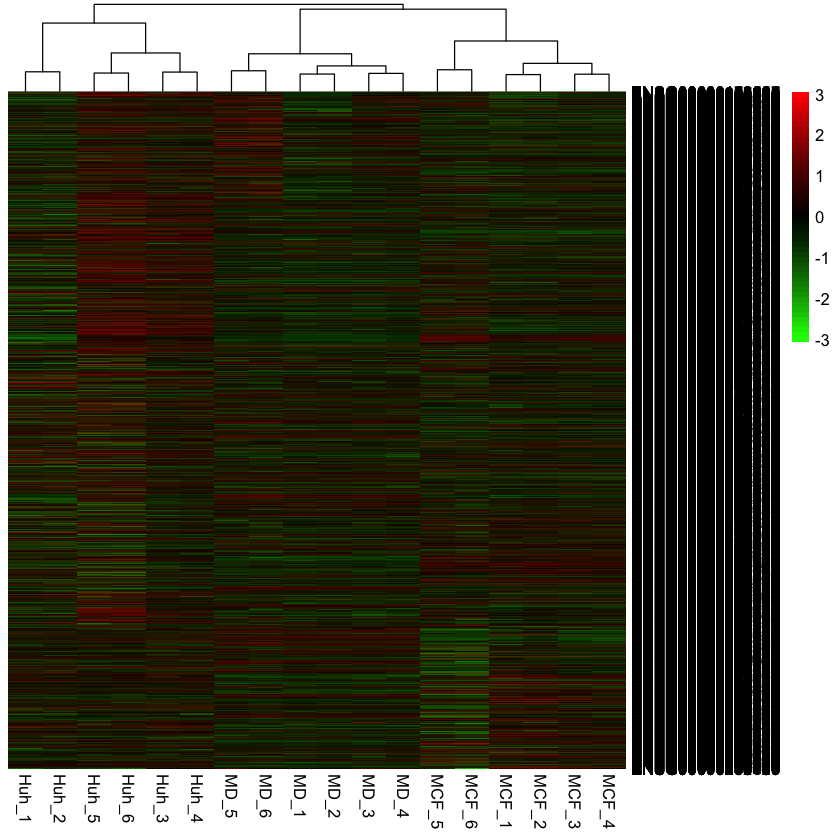

In [47]:
ph = pheatmap(vst,
              cluster_rows = F,
              #cluster_cols = F,
              color=colorRampPalette(c("green", "black", "red"))(50),
              scale = "row"
              )